In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [5]:
#Study CSV Files
sugar_path = "Resources/sugar_per_person_g_per_day-FAO.csv"
obesity_path = "Resources/obesity-cleaned - WHO.csv"

#Read CSV Files
sugar_data = pd.read_csv(sugar_path)
obesity_data = pd.read_csv(obesity_path)


#Need to get correlation for Year 2004.  Bad Teeth only has data for 2004.  Need to filter for GNI Data.
sugar_2013 = pd.DataFrame(sugar_data,columns = ['Country', '2013'])
obesity_2013 = pd.DataFrame(obesity_data,columns = ['Country', '2013'])

#Merge 2013 Data
sugar_obesity_2013 = pd.merge(sugar_2013, obesity_2013, on="Country", how = "inner")




sugar_obesity_2013=sugar_obesity_2013.rename(columns={'2013_x': 'Sugar Consumption (g per day)',
                                                         '2013_y': 'Obesity(% of Population)',
                                                        })
sugar_obesity_2013

,Country,Sugar Consumption (g per day),Obesity(% of Population)
0,Afghanistan,24.5,4.7
1,Albania,131.0,19.9
2,Algeria,78.2,25.3
3,Angola,44.7,7.1
4,Antigua and Barbuda,90.1,17.5
...,...,...,...
140,Uzbekistan,27.6,14.9
141,Vanuatu,51.4,23.2
142,Yemen,77.9,15.2
143,Zambia,28.1,7.1


In [6]:
#Export to CSV
sugar_obesity_2013.to_csv("sugar_obesity_2013.csv")


The correlation coefficient between obesity vs sugar consumption is 0.65
slope = 0.14, intercept = 5.93, r-value = 0.65, p-value = 0.0, standard error = 0.01


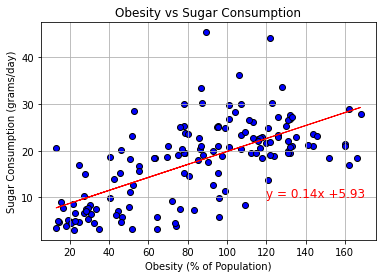

In [7]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(sugar_obesity_2013.iloc[:,1], sugar_obesity_2013.iloc[:,2], marker="o", facecolors="blue", edgecolors="black")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("Obesity vs Sugar Consumption")
plt.ylabel("Sugar Consumption (grams/day)")
plt.xlabel("Obesity (% of Population)")
plt.grid()


(slope, intercept, rvalue, pvalue, stderr) = linregress(sugar_obesity_2013.iloc[:,1], sugar_obesity_2013.iloc[:,2])
# Output of correlation coefficient and linear regression model
print(f"The correlation coefficient between obesity vs sugar consumption is {round(rvalue,2)}")
print(f"slope = {round(slope,2)}, intercept = {round(intercept,2)}, r-value = {round(rvalue, 2)}, p-value = {round(pvalue,2)}, standard error = {round(stderr,2)}")

# Calculate the values for the regression line (y=mx+b)
best_fit = slope * sugar_obesity_2013.iloc[:,1] + intercept

# Format the regression line formula to be displayed on the graph
best_fit_equation = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Plot regression line
plt.plot(sugar_obesity_2013.iloc[:,1],best_fit,linewidth = 1,color="red")
# Plot regression formula on graph
plt.annotate(best_fit_equation, (120, 10), fontsize=12, color='red')

plt.savefig("Obesity vs Sugar Consumption")
